# COVID-19 detection on CT images

### This model will help us to identify covid-19 infected patients with the CT scan images

The CT Scan images where used to figure out whether a person is infected from corona or not.Convolutional neural network is used to build such a model

### Importing Images into jupyternotebook

###### This image is of a person who is not infected by covid-19

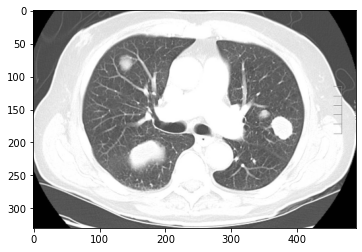

In [1]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('C:\\Users\\97150\\Desktop\\Adv_ML\\assignment-covid\\train\\non_covid\\14.png')
plt.imshow(img)

###### This image is of a person who is infected by covid-19

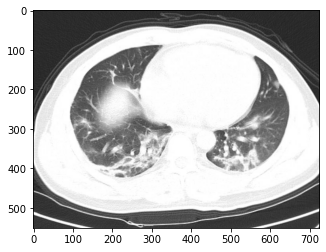

In [2]:
img1=cv2.imread('C:\\Users\\97150\Desktop\\Adv_ML\\assignment-covid\\train\\covid\\2020.01.24.919183-p27-132.png')
plt.imshow(img1)

### Importing Required libraries

In [3]:
import os
import tensorflow as tf 
import numpy as np
import pandas as pd

In [4]:
# Importing the Keras libraries and packages
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Building CNN
Image_classifier = models.Sequential()                    #Initializing CNN

In [6]:
# Step 1 - Convolution
Image_classifier.add(layers.Conv2D(32, (3, 3), input_shape = (256, 256,1), activation = 'relu'))  #RELU -CONVERTS NEGATIVE 
                                                                                                  #NO TO ZERO & POSITIVE AS 
#(256, 256,1)  '1'INDICATES IT IS A GRAYSCALE IMAGE                                               #IT IS.

In [7]:
# Step 2 - Pooling
Image_classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))    #KERNAL SIZE IS PREFERED TO BE 2*2 FROM THE IMAGE ITSELF 
                                                                 #JUMPING KERNAL


In [8]:
# Adding a second convolutional layer
Image_classifier.add(layers.Conv2D(32, (3, 3), activation = 'relu'))  #WE CAN ADD AS MANY CONVOLUTION AND MAXPOOLING LAYERS 
Image_classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))         #AS PER THE COMPLEXITY OF DATA

In [9]:
# Adding a third convolutional layer
Image_classifier.add(layers.Conv2D(16, (3, 3), activation = 'relu'))  #ALWAYS PREFEREABLE TO HAVE MAXPOOLING AFTER EACH 
Image_classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))         #CONVOLUTION LAYER

In [10]:
# Adding a fourth convolutional layer
Image_classifier.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
Image_classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))          #AT THIS STAGE WE GET A POOLED FEATURE MAP

In [11]:
# STEP 3:Flattening
Image_classifier.add(layers.Flatten())                                #POOLED FEATURE MAP IS FLATTED HERE.
                                                                      #IE.,CHANGED TO ONE DIMENTIONAL ARRAY - 
                                                                      #THEN ONLY WE CAN PASS ITTO CNN

In [12]:
# STEP 4: DEEP NEURAL NETWORK - Full connection
Image_classifier.add(layers.Dense(units = 586, activation = 'relu'))
Image_classifier.add(layers.Dense(units = 248, activation = 'relu'))
Image_classifier.add(layers.Dense(units = 1, activation = 'sigmoid')) #SIGMOID ACTIVATION FUNCTION AS IT IS BINARY CLASS PROBLEM

Image_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [13]:
# Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,              #RESCALING THE IMAGE - CONVERGENCE WILL HAPPEN SOON 
                                   shear_range = 0.2,             #TILTING IMAGE
                                   zoom_range = 0.2,              #ZOOMING
                                   horizontal_flip = True)        #MIRROR IMAGE

test_datagen = ImageDataGenerator(rescale = 1./255)               #JUST SCALING IS ENOUGH FOR TEST DATA


training_set = train_datagen.flow_from_directory('C:\\Users\\97150\\Desktop\\Adv_ML\\assignment-covid\\train',
                                                 target_size = (256, 256),
                                                 batch_size = 8,
                                                 class_mode = 'binary',
                                                 color_mode='grayscale',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory('C:\\Users\\97150\\Desktop\\Adv_ML\\assignment-covid\\test',
                                            target_size = (256, 256),
                                            batch_size = 8,
                                            class_mode = 'binary',
                                            color_mode='grayscale',
                                            shuffle=False)


Found 539 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


In [19]:
##ModelCheckpoint - final model wil be saved with best weights
#EarlyStopping - It will check for specific no of rounds,if there is no improvement in model performannce it will stop early 
#without completing the total no of epochs.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('..//image_classifier.h5', monitor='val_loss', save_best_only=True, mode='min')
]

train_samples=539
validation_samples=207
batch_size=8

history=Image_classifier.fit_generator(training_set,
                         steps_per_epoch = train_samples//batch_size,
                         epochs=40,
                         validation_data = test_set,
                         validation_steps = validation_samples//batch_size,callbacks=keras_callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 67 steps, validate for 25 steps
Epoch 1/40
67/67 [==============================] - 33s 496ms/step - loss: 0.4083 - accuracy: 0.8192 - val_loss: 0.7898 - val_accuracy: 0.5850
Epoch 2/40
67/67 [==============================] - 35s 517ms/step - loss: 0.4043 - accuracy: 0.8117 - val_loss: 0.6948 - val_accuracy: 0.6450
Epoch 3/40
67/67 [==============================] - 34s 509ms/step - loss: 0.3889 - accuracy: 0.8154 - val_loss: 0.7584 - val_accuracy: 0.5900
Epoch 4/40
67/67 [==============================] - 33s 500ms/step - loss: 0.3799 - accuracy: 0.8399 - val_loss: 0.6981 - val_accuracy: 0.6450
Epoch 5/40
67/67 [==============================] - 34s 505ms/step - loss: 0.3223 - accuracy: 0.8531 - val_loss: 0.8559 - val_accuracy: 0.6100
Epoch 6/40
67/67 [==============================] - 34s 501ms/step - loss: 0.3303 - accuracy: 0.8437 - val_loss: 0.8913 - val_accuracy: 0.6500
Epoch 7/40
67/67 [==============================] 

In [20]:
Image_classifier.save('../image_classifier.h5') 

Text(0, 0.5, 'Accuracy')

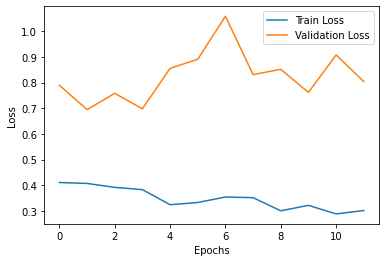

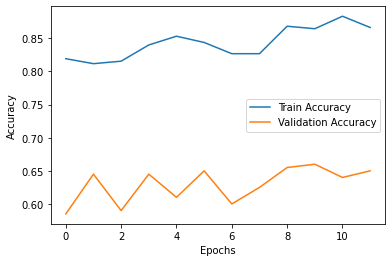

In [21]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


### There should not be much difference between train and test results,then only the model is good model 

# Using the model builded, checking with an image whether it is correctly predicting or not

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\97150\Desktop\\Adv_ML\\assignment-covid\\train\\covid\\2020.02.10.20021584-p6-52%12.png',
                        target_size = (256, 256),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
print(training_set.class_indices)
result = Image_classifier.predict(test_image)
print('The test image is belongs to the class: ',result[0][0])

{'covid': 0, 'non_covid': 1}
The test image is belongs to the class:  0.0


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image2 = image.load_img('C:\\Users\\97150\\Desktop\\Adv_ML\\assignment-covid\\train\\non_covid\\20.jpg',
                        target_size = (256, 256),color_mode='grayscale')
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
print(training_set.class_indices)
result = Image_classifier.predict(test_image2)
print('The test image is belongs to the class: ',result[0][0])

{'covid': 0, 'non_covid': 1}
The test image is belongs to the class:  1.2443893e-19


## Hence, this model can be used to predict whether a person is infected from covid or not.

# -----------------------------------------------End---------------------------------------------------------